# Data Cleaning

- Checked nulls
- Fixed types
- cleaned outlires

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_excel('/Users/ryanmurray/Desktop/Project_Folder/CLV_Project/CLV-MLOPs-Project/data/raw/Online Retail.xlsx')

In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [74]:
df.shape

(541909, 8)

In [75]:
# Cleaning Null Values:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.698618x0.77)


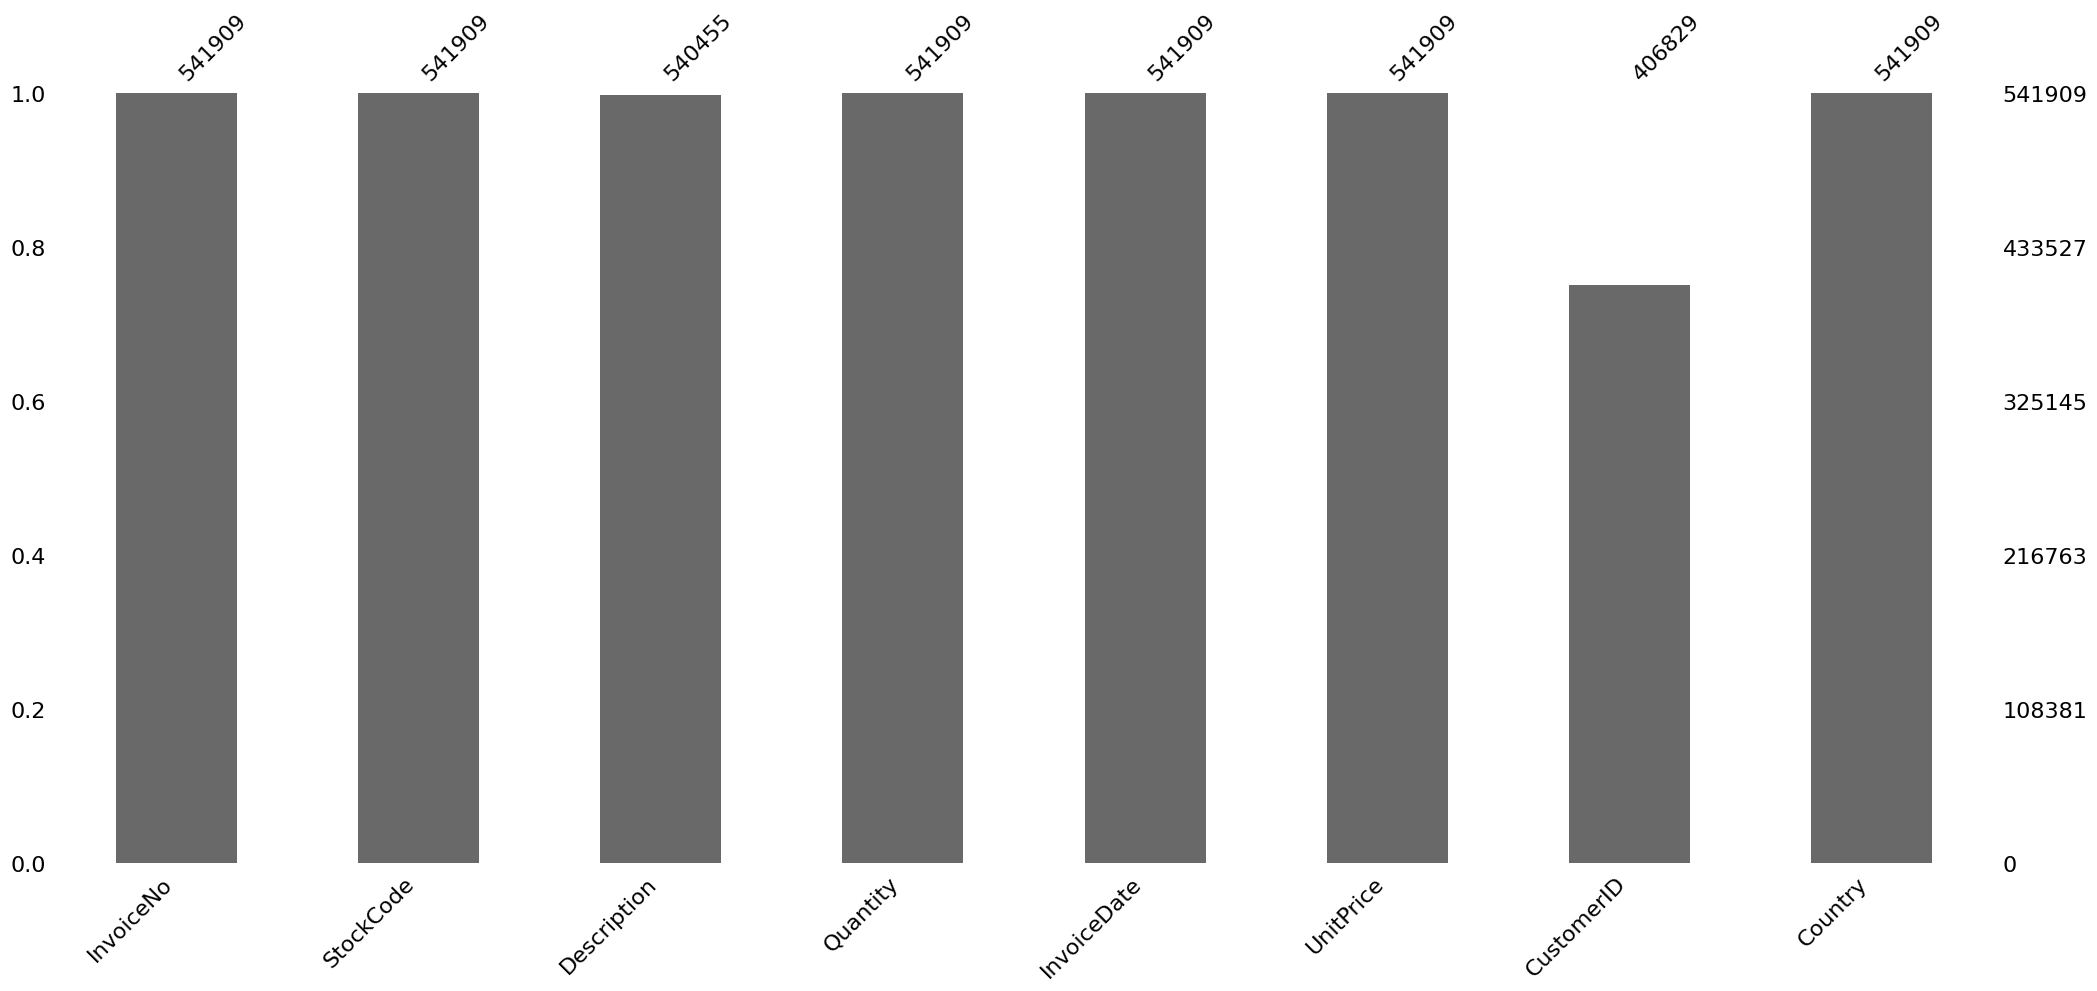

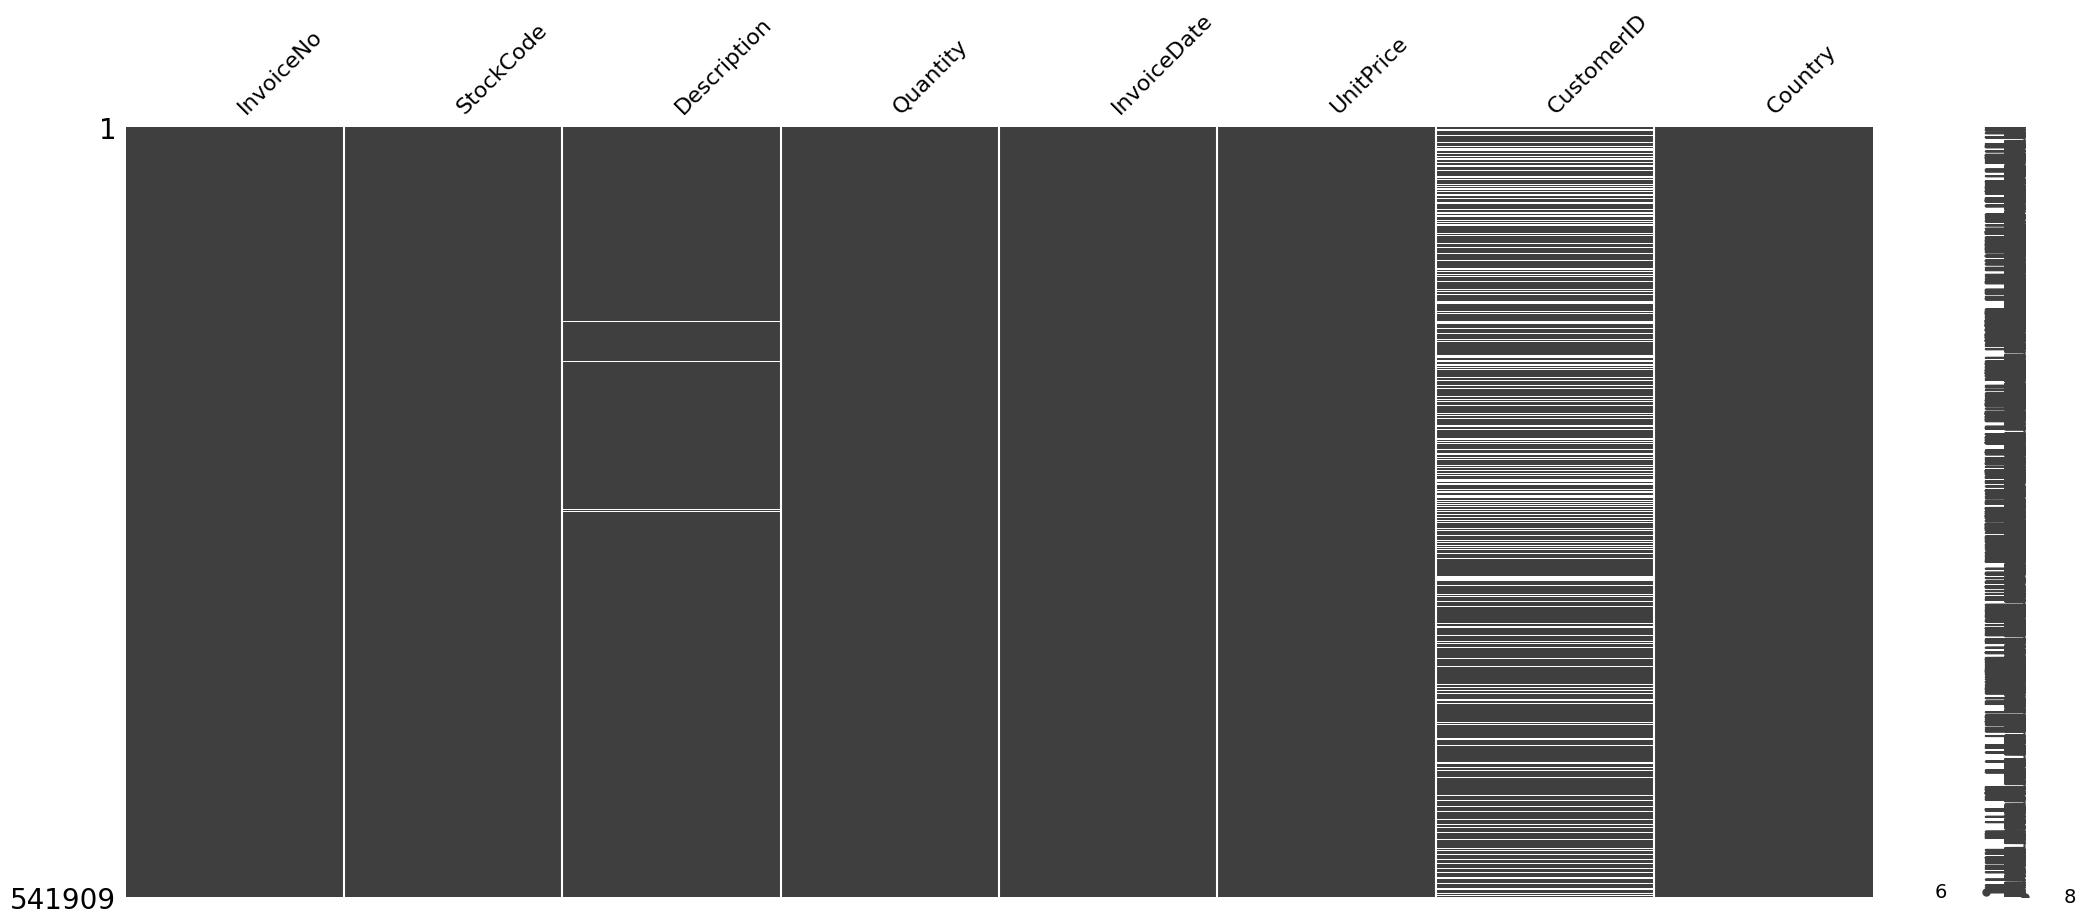

In [76]:
import missingno as msno

print(msno.bar(df))
print(msno.matrix(df))

In [77]:
# To predict CLV we need to have CustomerID values, so we will drop rows where CustomerID is null.
df = df.dropna(subset=['CustomerID'])

In [78]:
# Next I will check the values to see if null values are filled
print(df['Country'].value_counts())
# So unspecified countrys are counted as null values - wil be removed 
df = df[df['Country'] != 'Unspecified']

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [79]:
df['Description'] = df['Description'].fillna('Unspecified')


In [80]:
print(df.isnull().sum())
print(df.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(406585, 8)


In [81]:
# Cleaning Data Types:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [82]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df['StockCode'] = df['StockCode'].astype('str')
df['Description'] = df['Description'].astype('str')
df['CustomerID']= df['CustomerID'].astype('int64')
df['Country'] = df['Country'].astype('category')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [83]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country              category
dtype: object

In [84]:
# Ensuring data quality
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406585.000000,406585,406585.000000,406585.000000
mean,12.064142,2011-07-10 16:34:39.003799552,3.460627,15288.630473
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 14:25:00,1.250000,13956.000000
50%,5.000000,2011-07-31 12:08:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:07:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.767860,NaN,69.335909,1713.284209


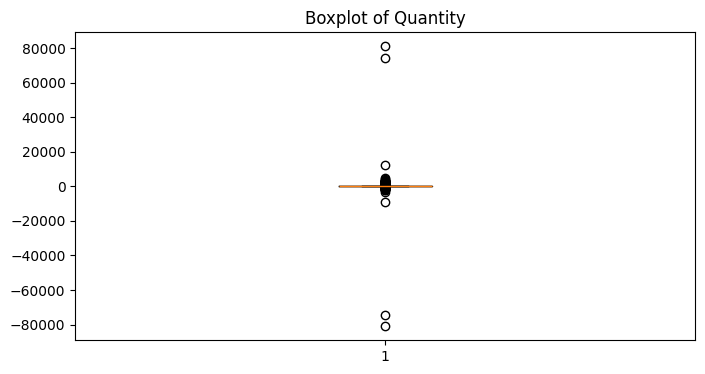

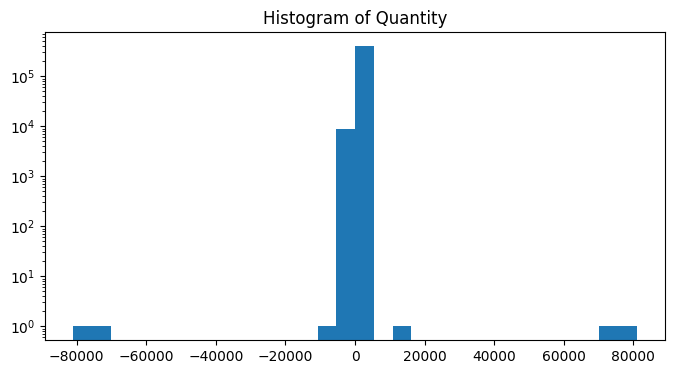

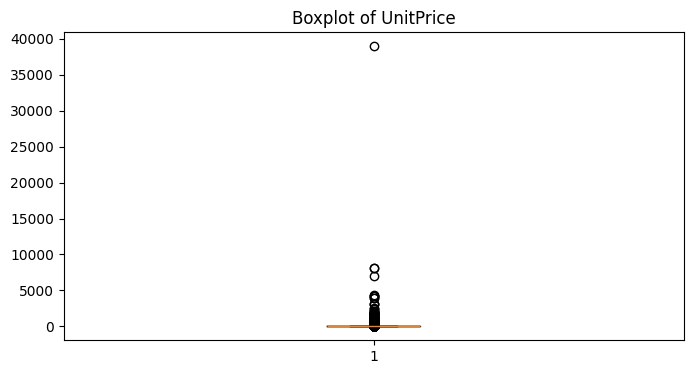

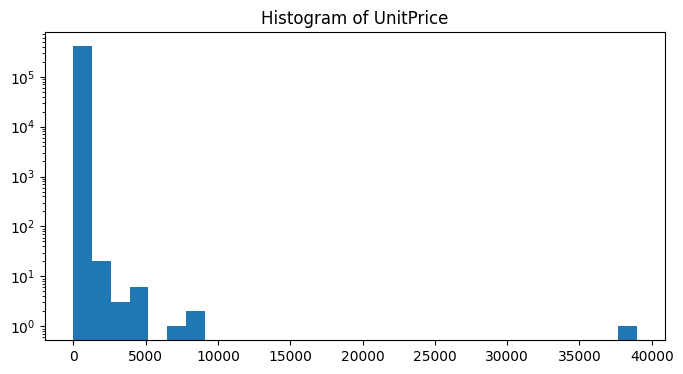

In [85]:
int_vars = ['Quantity', 'UnitPrice']

for var in int_vars:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()
    plt.figure(figsize=(8, 4))
    plt.hist(df[var], bins=30)
    plt.yscale('log')
    plt.title(f'Histogram of {var}')
    plt.show()

In [86]:
# Here we see that there are some negative values in Quantity are likely returns. these will be kept as they are valid data points.
# There are however outlires which will be removed to improve data quality.
# Removing outliers
q = 0.999
price_threshold = df['UnitPrice'].quantile(q)
count = df[df['UnitPrice'] > price_threshold].shape[0]
print(f'Removing {count} records with UnitPrice above {price_threshold}')
df = df[df['UnitPrice'] <= price_threshold]




Removing 388 records with UnitPrice above 50.0


In [87]:
q_low, q_high = 0.001, 0.999
col = "Quantity"

low_th = df[col].quantile(q_low)
high_th = df[col].quantile(q_high)

count_low  = (df[col] < low_th).sum()
count_high = (df[col] > high_th).sum()
count_total = ((df[col] < low_th) | (df[col] > high_th)).sum()

print(f"{col}: removing {count_total} rows outside [{low_th:.2f}, {high_th:.2f}]")
print(f"  below {q_low*100:.0f}th pct: {count_low}")
print(f"  above {q_high*100:.0f}th pct: {count_high}")

df = df[(df[col] >= low_th) & (df[col] <= high_th)]

Quantity: removing 795 rows outside [-40.00, 504.00]
  below 0th pct: 402
  above 100th pct: 393


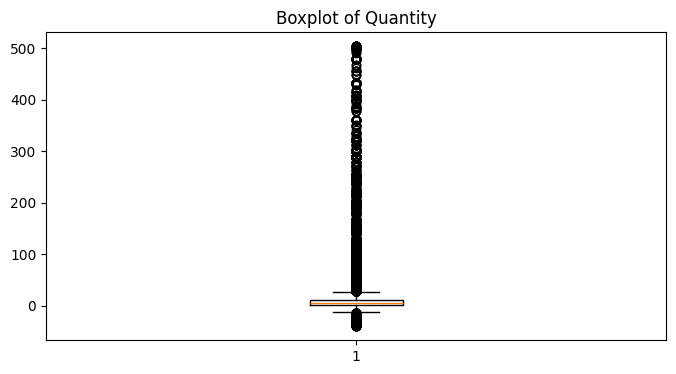

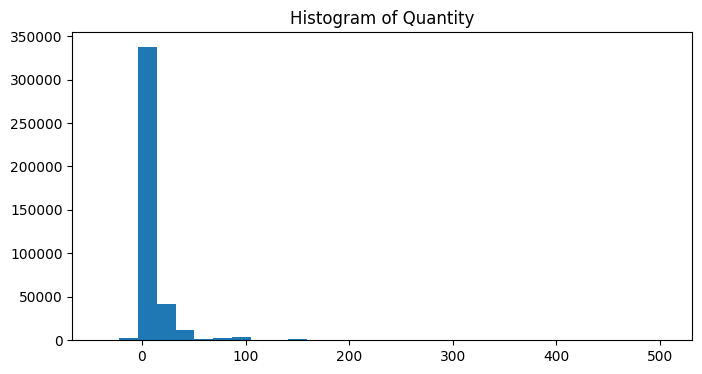

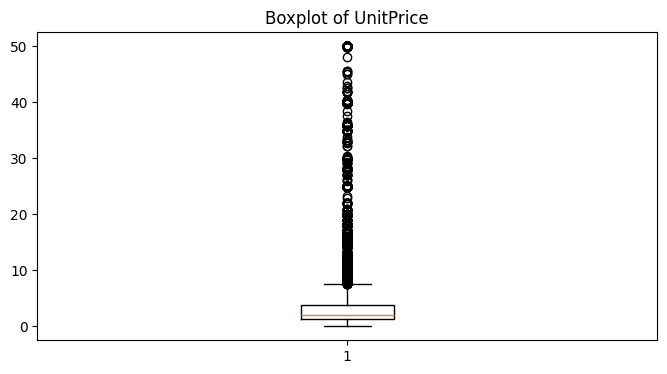

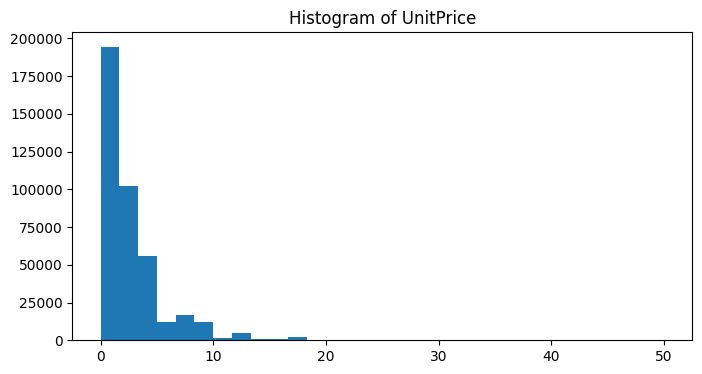

In [88]:
int_vars = ['Quantity', 'UnitPrice']

for var in int_vars:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()
    plt.figure(figsize=(8, 4))
    plt.hist(df[var], bins=30)
    plt.title(f'Histogram of {var}')
    plt.show()

In [89]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,405402.000000,405402,405402.000000,405402.000000
mean,11.355356,2011-07-10 17:15:59.168677376,2.911895,15288.689020
min,-40.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-06 14:53:00,1.250000,13956.000000
50%,5.000000,2011-07-31 12:16:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:20:00,3.750000,16791.000000
max,504.000000,2011-12-09 12:50:00,50.000000,18287.000000
std,25.713021,NaN,3.253712,1713.101144
